<a href="https://colab.research.google.com/github/Yashchauhan23/Deep_Learning/blob/main/DCTonFashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DISCRETE COSINE TRANSFORM(DCT)
###This section demonstrates the Discrete Cosine Transform of an fashion_mnist dataset. As in the Jpeg standard the DCT is performed blockwise. The entire image is partitioned into non-overlapping blocks of size (8x8) pixels. The transformed image is backtransformed by applying the Inverse Discrete Cosine Transform (IDCT). The reconstructed image is identical to the original image

In [21]:
import tensorflow.keras
from tensorflow.keras.datasets import fashion_mnist

###Loading the Fashion_mnist dataset

In [22]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

###Converting into .jpg format

In [ ]:
import numpy as np
from PIL import Image, ImageOps
import os

def save_image(filename, data_array):
    im = Image.fromarray(data_array.astype('uint8'))
    im_invert = ImageOps.invert(im)
    im_invert.save(filename)

# Load Fashion-MNIST Data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

DIR_NAME = "JPEGImages"
if os.path.exists(DIR_NAME) == False:
    os.mkdir(DIR_NAME)

# Save Images
i = 0
for li in [x_train, x_test]:
    print("[---------------------------------------------------------------]")
    for x in li:
        filename = "{0}/{1:05d}.jpg".format(DIR_NAME,i)
        print(filename)
        save_image(filename, x)
        i += 1

###Importing essential libraries

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

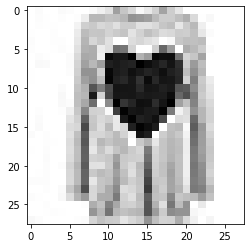

In [25]:
img = cv2.imread('JPEGImages/69985.jpg')
plt.imshow(img)

###The height and width of the blocks is B=8. An image is imported and transformed to a grayscale image. Moreover, the image is cropped, such that its height and width is a multiple of the blocksize B.

28
28


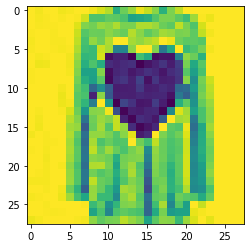

In [47]:
B=8 #blocksize
fn3='JPEGImages/69985.jpg'
img1 = cv2.imread(fn3, cv2.IMREAD_GRAYSCALE)
h,w=np.array(img1.shape[:2])/B * B
h=int(h)
w=int(w)
print (h)
print (w)
img1=img1[:h,:w]
plt.imshow(img1)

###For each block in the image the DCT is applied. The transformed image is stored in the variable Trans and it is saved to the file Transformed.jpg:

In [40]:
blocksV=int(h/B)
blocksH=int(w/B)
vis0 = np.zeros((h,w), np.float32)
Trans = np.zeros((h,w), np.float32)
vis0[:h, :w] = img1
for row in range(blocksV):
        for col in range(blocksH):
                currentblock = cv2.dct(vis0[row*B:(row+1)*B,col*B:(col+1)*B])
                Trans[row*B:(row+1)*B,col*B:(col+1)*B]=currentblock
cv2.imwrite('Transformed.jpg', Trans)

True

In [ ]:
print(Trans)

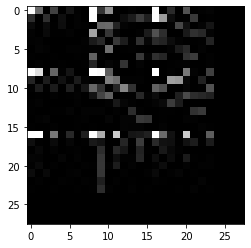

In [42]:
Transformed_image = cv2.imread('Transformed.jpg')
plt.imshow(Transformed_image)

###Then the IDCT is applied to reconstruct the original image from the transformed representation. The reconstructed image is stored in the variable back0 and it is saved to the file BackTransformed.jpg

In [43]:
back0 = np.zeros((h,w), np.float32)
for row in range(blocksV):
        for col in range(blocksH):
                currentblock = cv2.idct(Trans[row*B:(row+1)*B,col*B:(col+1)*B])
                back0[row*B:(row+1)*B,col*B:(col+1)*B]=currentblock
cv2.imwrite('BackTransformed.jpg', back0)

True

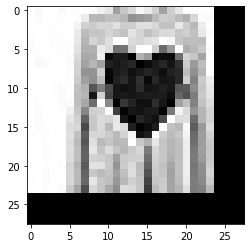

In [44]:
BackTransformed_image = cv2.imread('BackTransformed.jpg')
plt.imshow(BackTransformed_image)